In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargamos los datos

In [2]:
data = pd.read_csv("FinancialBehavior.csv",
                index_col = 0)
data.shape

/home/luis/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2488193, 42)

Los datos son muy grandes y tuve problemas con la memoria RAM, así que sólo utilicé la mitad

In [3]:
data = data.iloc[:1244096, :]
data.shape

(1244096, 42)

In [4]:
data.head()

,PROV_CUENTA,PROV_TIPO_DOCUMENTO,PROV_NUM_DOCUMENTO,PROV_FEC_APER,ALTURA_MORA,MORA_MAXIMA,MES_1,MES_2,MES_3,MES_4,...,MES_27,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36
1,8228769611,1,79611181,20161006,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,8169086811,1,52249171,20140503,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8113372805,1,93377389,20110828,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8224958500,1,1113629973,20160814,0.0,20.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,8237356206,1,51652333,20170127,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Quité las columnas que no necesitaba

In [5]:
data = data.drop(["PROV_CUENTA"], axis = 1)
data = data.drop("PROV_TIPO_DOCUMENTO", axis = 1)
data = data.drop("PROV_NUM_DOCUMENTO",axis = 1)
data = data.drop("PROV_FEC_APER",axis = 1)

In [6]:
data.head()

,ALTURA_MORA,MORA_MAXIMA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,...,MES_27,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Análisis exploratorio:
Exploré el data set en dos partes, los meses (vistos como una serie de tiempo) y los datos de altura mora y mora máxima.

## Serie de tiempo:
Cada cuenta tiene la serie de tiempo que indica como ha ido pagando y debiendo el cliente y se muestra en la siguiente gráfica:

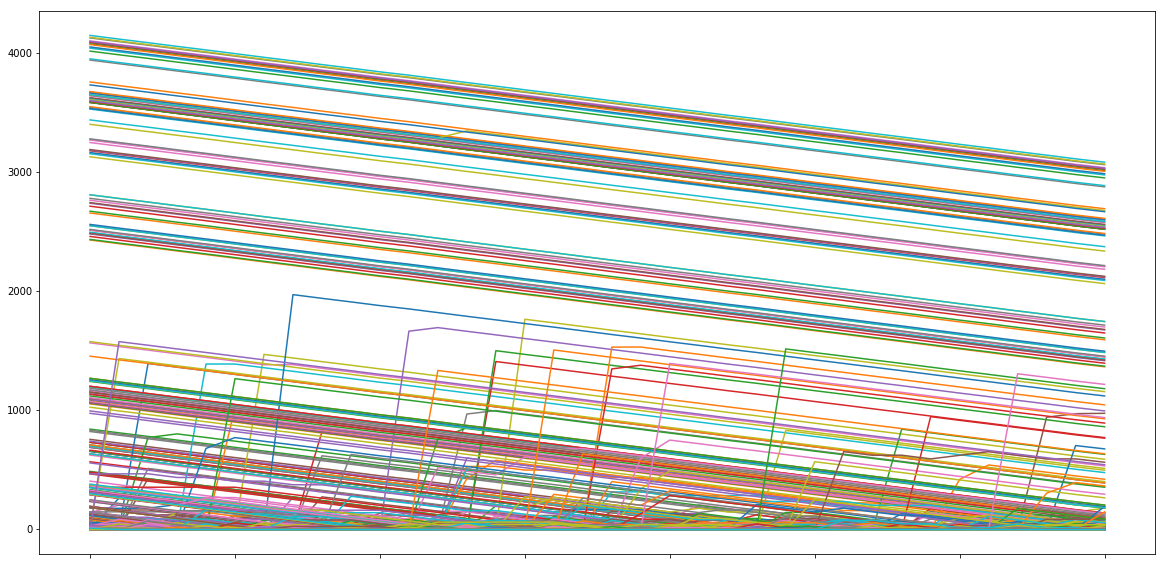

In [7]:
data.iloc[2000:5000,2:38].T.plot(figsize=(20,10)).get_legend().remove()

Para poder obtener un score con estos datos se utilizó una técnica de clusterización KMeans y para entrenar Kmeans se utilizaron los datos de los meses (data.iloc[:,2:]) y queremos obtener sólamente 4 clusters

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(data.iloc[:,2:])

Se predijeron los datos y se guardaron en una nueva columna llamada "resultado"

In [9]:
result = kmeans.predict(data.iloc[:,2:])

In [10]:
data["resultado"] = result + 1

In [11]:
data.head()

,ALTURA_MORA,MORA_MAXIMA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,...,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,resultado
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1


## Grafica

Así es como queda la gráfica después de hacer los clusters, de color verte están los que han pagado menos y más a tiempo y el rojo son los que deben más y se retrasan más

/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


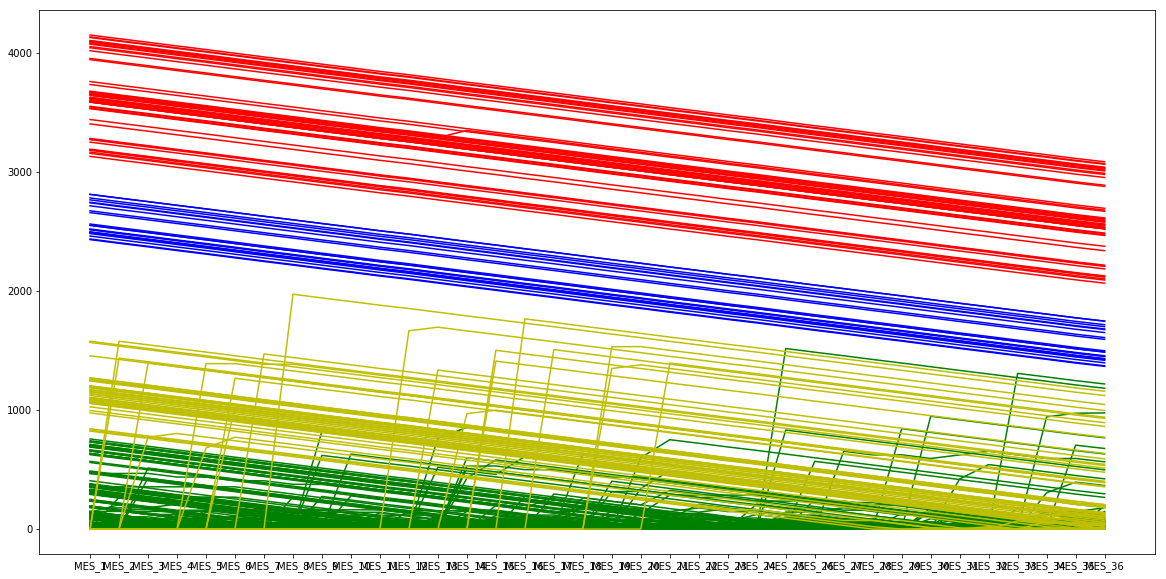

In [12]:
plt.figure(figsize=(20,10))
plt.plot(data.iloc[2000:5000,2:38][(data.iloc[:,38] == 1)].T, color="g")
plt.plot(data.iloc[2000:5000,2:38][(data.iloc[:,38] == 2)].T, color="b")
plt.plot(data.iloc[2000:5000,2:38][(data.iloc[:,38] == 3)].T, color="y")
plt.plot(data.iloc[2000:5000,2:38][(data.iloc[:,38] == 4)].T, color="r")
# d1 = data.iloc[2000:5000,2:38][(data.iloc[:,38] == 1)].T.plot(figsize=(20,10), color='r').get_legend().remove()
# data.iloc[2000:5000,2:38][(data.iloc[:,38] == 1)].T.plot(figsize=(20,10), color='r').get_legend().remove()

## Altura Mora y Mora máxima

In [13]:
data.iloc[:,:2].head()

,ALTURA_MORA,MORA_MAXIMA
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,20.0
5,0.0,0.0


Al graficar Altura Mora y Mora Máxima obtenemos el siguiente resultado, en el que podemos ver que se pueden tener dos patrones, o la Altura Mora incrementa junto con la Mora Máxima o sólo incrementa la Mora Máxima

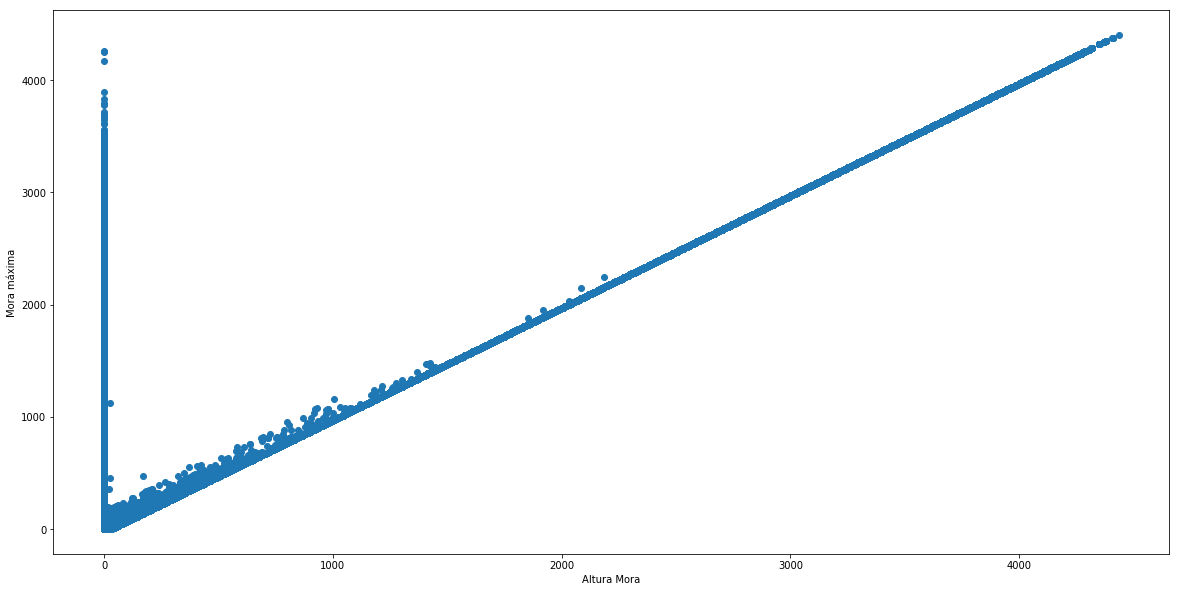

In [14]:
plt.figure(figsize=(20,10))
plt.xlabel('Altura Mora')
plt.ylabel('Mora máxima')
plt.plot(data.iloc[:,0],data.iloc[:,1],"o")

También vamos a clusterizar estos dos datos con la técnica de KMeans para obtener los que tienen menos deudas y los que tienen menos tiempo debiendo

In [15]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data.iloc[:,:2])

In [16]:
result = kmeans.predict(data.iloc[:,:2])

El resultado lo metemos a una nueva columna llamada "resultado 2" en el dataset original

In [17]:
data["resultado 2"] = result + 1

Ahora tenemos dos resultados en el dataset

In [18]:
data.head()

,ALTURA_MORA,MORA_MAXIMA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,...,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,resultado,resultado 2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,1


Si graficamos el dataset clusterizado se ve de la siguente manera:

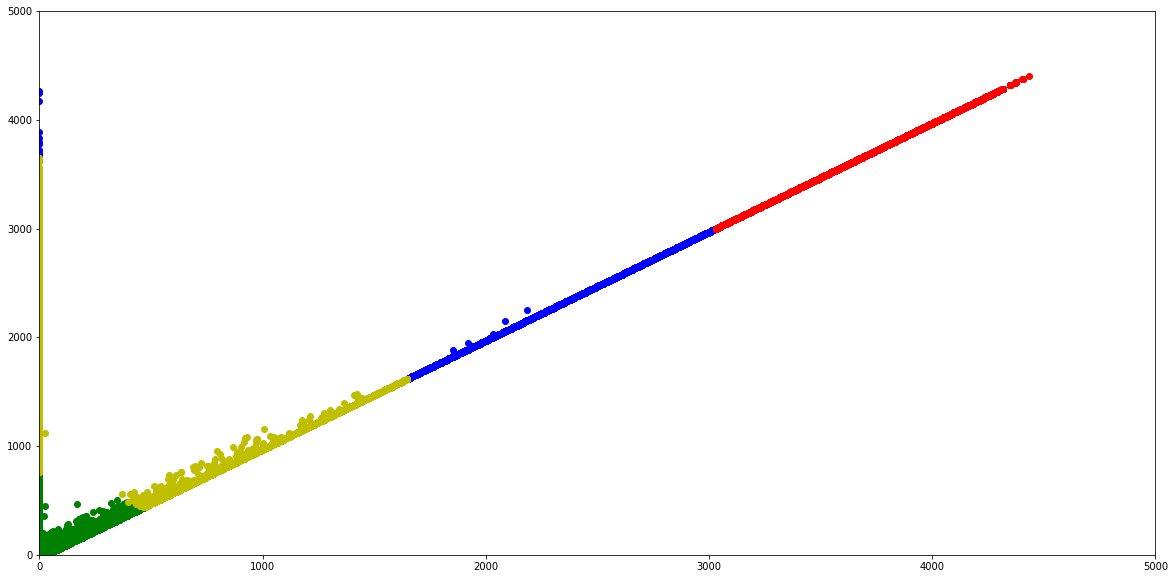

In [19]:
plt.figure(figsize=(20,10))
plt.plot(data.iloc[:,0][(data.iloc[:,39] == 1)],data.iloc[:,1][(data.iloc[:,39] == 1)],"og")
plt.plot(data.iloc[:,0][(data.iloc[:,39] == 2)],data.iloc[:,1][(data.iloc[:,39] == 2)],"ob")
plt.plot(data.iloc[:,0][(data.iloc[:,39] == 3)],data.iloc[:,1][(data.iloc[:,39] == 3)],"oy")
plt.plot(data.iloc[:,0][(data.iloc[:,39] == 4)],data.iloc[:,1][(data.iloc[:,39] == 4)],"or")
plt.axis([0, 5000, 0, 5000])
plt.show()

Ahora multiplicamos un resultado por el otro para poder tener solamente un score, las personas más confiables y a las que se le deben aprovar créditos son a las que tienen como score 1 ya que en los dos resultados obtuvieron 1 y a las que no se les deben dar créditos es a las personas con score 16 ya que en los dos resultados obtuvieron 4

In [20]:
data["score"] = data.pop("resultado") * data.pop("resultado 2")

In [21]:
data

,ALTURA_MORA,MORA_MAXIMA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,...,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,score
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
6,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
